* THE TOP 5 PERSONALITY TRAITS A HUMAN BEING HAS:
    1. <b> O- Openness -</b> Willing to explore.
    2. <b> C - conscientiousness - </b> Very disciplined.
    3. <b> E- Extrovert -</b>  Outgoing
    4. <b> A - Agreeable -</b> Highly Co-operative
    5. <b> N - Neuroticism - </b> Emotionally unstable/ depressed/ weak mindset. 

<b> AIM - </b> To predict the personality of a person by grouping our data into the above 5 categories. 

* Basically we need to form 5 clusters, each cluster having a type of trait.
* Clustering is a <b> Unsupervised Machine Learning </b> technique. 

In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv('data-final.csv',delimiter='\t')

In [5]:
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0


In [6]:
data.shape

(1015341, 110)

In [7]:
data.columns

Index(['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9',
       'EXT10',
       ...
       'dateload', 'screenw', 'screenh', 'introelapse', 'testelapse',
       'endelapse', 'IPC', 'country', 'lat_appx_lots_of_err',
       'long_appx_lots_of_err'],
      dtype='object', length=110)

* <b> Look like columns after 50 are not required for our analysis. Let's drop them. </b>

In [8]:
data.drop(data.columns[50:], axis=1, inplace=True)

* <b> Now our data has only those 5 personality traits . </b>

In [10]:
data.columns

Index(['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9',
       'EXT10', 'EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8',
       'EST9', 'EST10', 'AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7',
       'AGR8', 'AGR9', 'AGR10', 'CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6',
       'CSN7', 'CSN8', 'CSN9', 'CSN10', 'OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5',
       'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10'],
      dtype='object')

In [13]:
data.shape

(1015341, 50)

In [12]:
data.isnull().sum()

EXT1     1783
EXT2     1783
EXT3     1783
EXT4     1783
EXT5     1783
EXT6     1783
EXT7     1783
EXT8     1783
EXT9     1783
EXT10    1783
EST1     1783
EST2     1783
EST3     1783
EST4     1783
EST5     1783
EST6     1783
EST7     1783
EST8     1783
EST9     1783
EST10    1783
AGR1     1783
AGR2     1783
AGR3     1783
AGR4     1783
AGR5     1783
AGR6     1783
AGR7     1783
AGR8     1783
AGR9     1783
AGR10    1783
CSN1     1783
CSN2     1783
CSN3     1783
CSN4     1783
CSN5     1783
CSN6     1783
CSN7     1783
CSN8     1783
CSN9     1783
CSN10    1783
OPN1     1783
OPN2     1783
OPN3     1783
OPN4     1783
OPN5     1783
OPN6     1783
OPN7     1783
OPN8     1783
OPN9     1783
OPN10    1783
dtype: int64

* Ways to handle null values
    * Imputation- Mean, mode, median ( depending on the distribution)
    * Remove all the null values

In [16]:
data=data.dropna()

In [17]:
data.isnull().sum()

EXT1     0
EXT2     0
EXT3     0
EXT4     0
EXT5     0
EXT6     0
EXT7     0
EXT8     0
EXT9     0
EXT10    0
EST1     0
EST2     0
EST3     0
EST4     0
EST5     0
EST6     0
EST7     0
EST8     0
EST9     0
EST10    0
AGR1     0
AGR2     0
AGR3     0
AGR4     0
AGR5     0
AGR6     0
AGR7     0
AGR8     0
AGR9     0
AGR10    0
CSN1     0
CSN2     0
CSN3     0
CSN4     0
CSN5     0
CSN6     0
CSN7     0
CSN8     0
CSN9     0
CSN10    0
OPN1     0
OPN2     0
OPN3     0
OPN4     0
OPN5     0
OPN6     0
OPN7     0
OPN8     0
OPN9     0
OPN10    0
dtype: int64

<b> Checking for outliers </b>

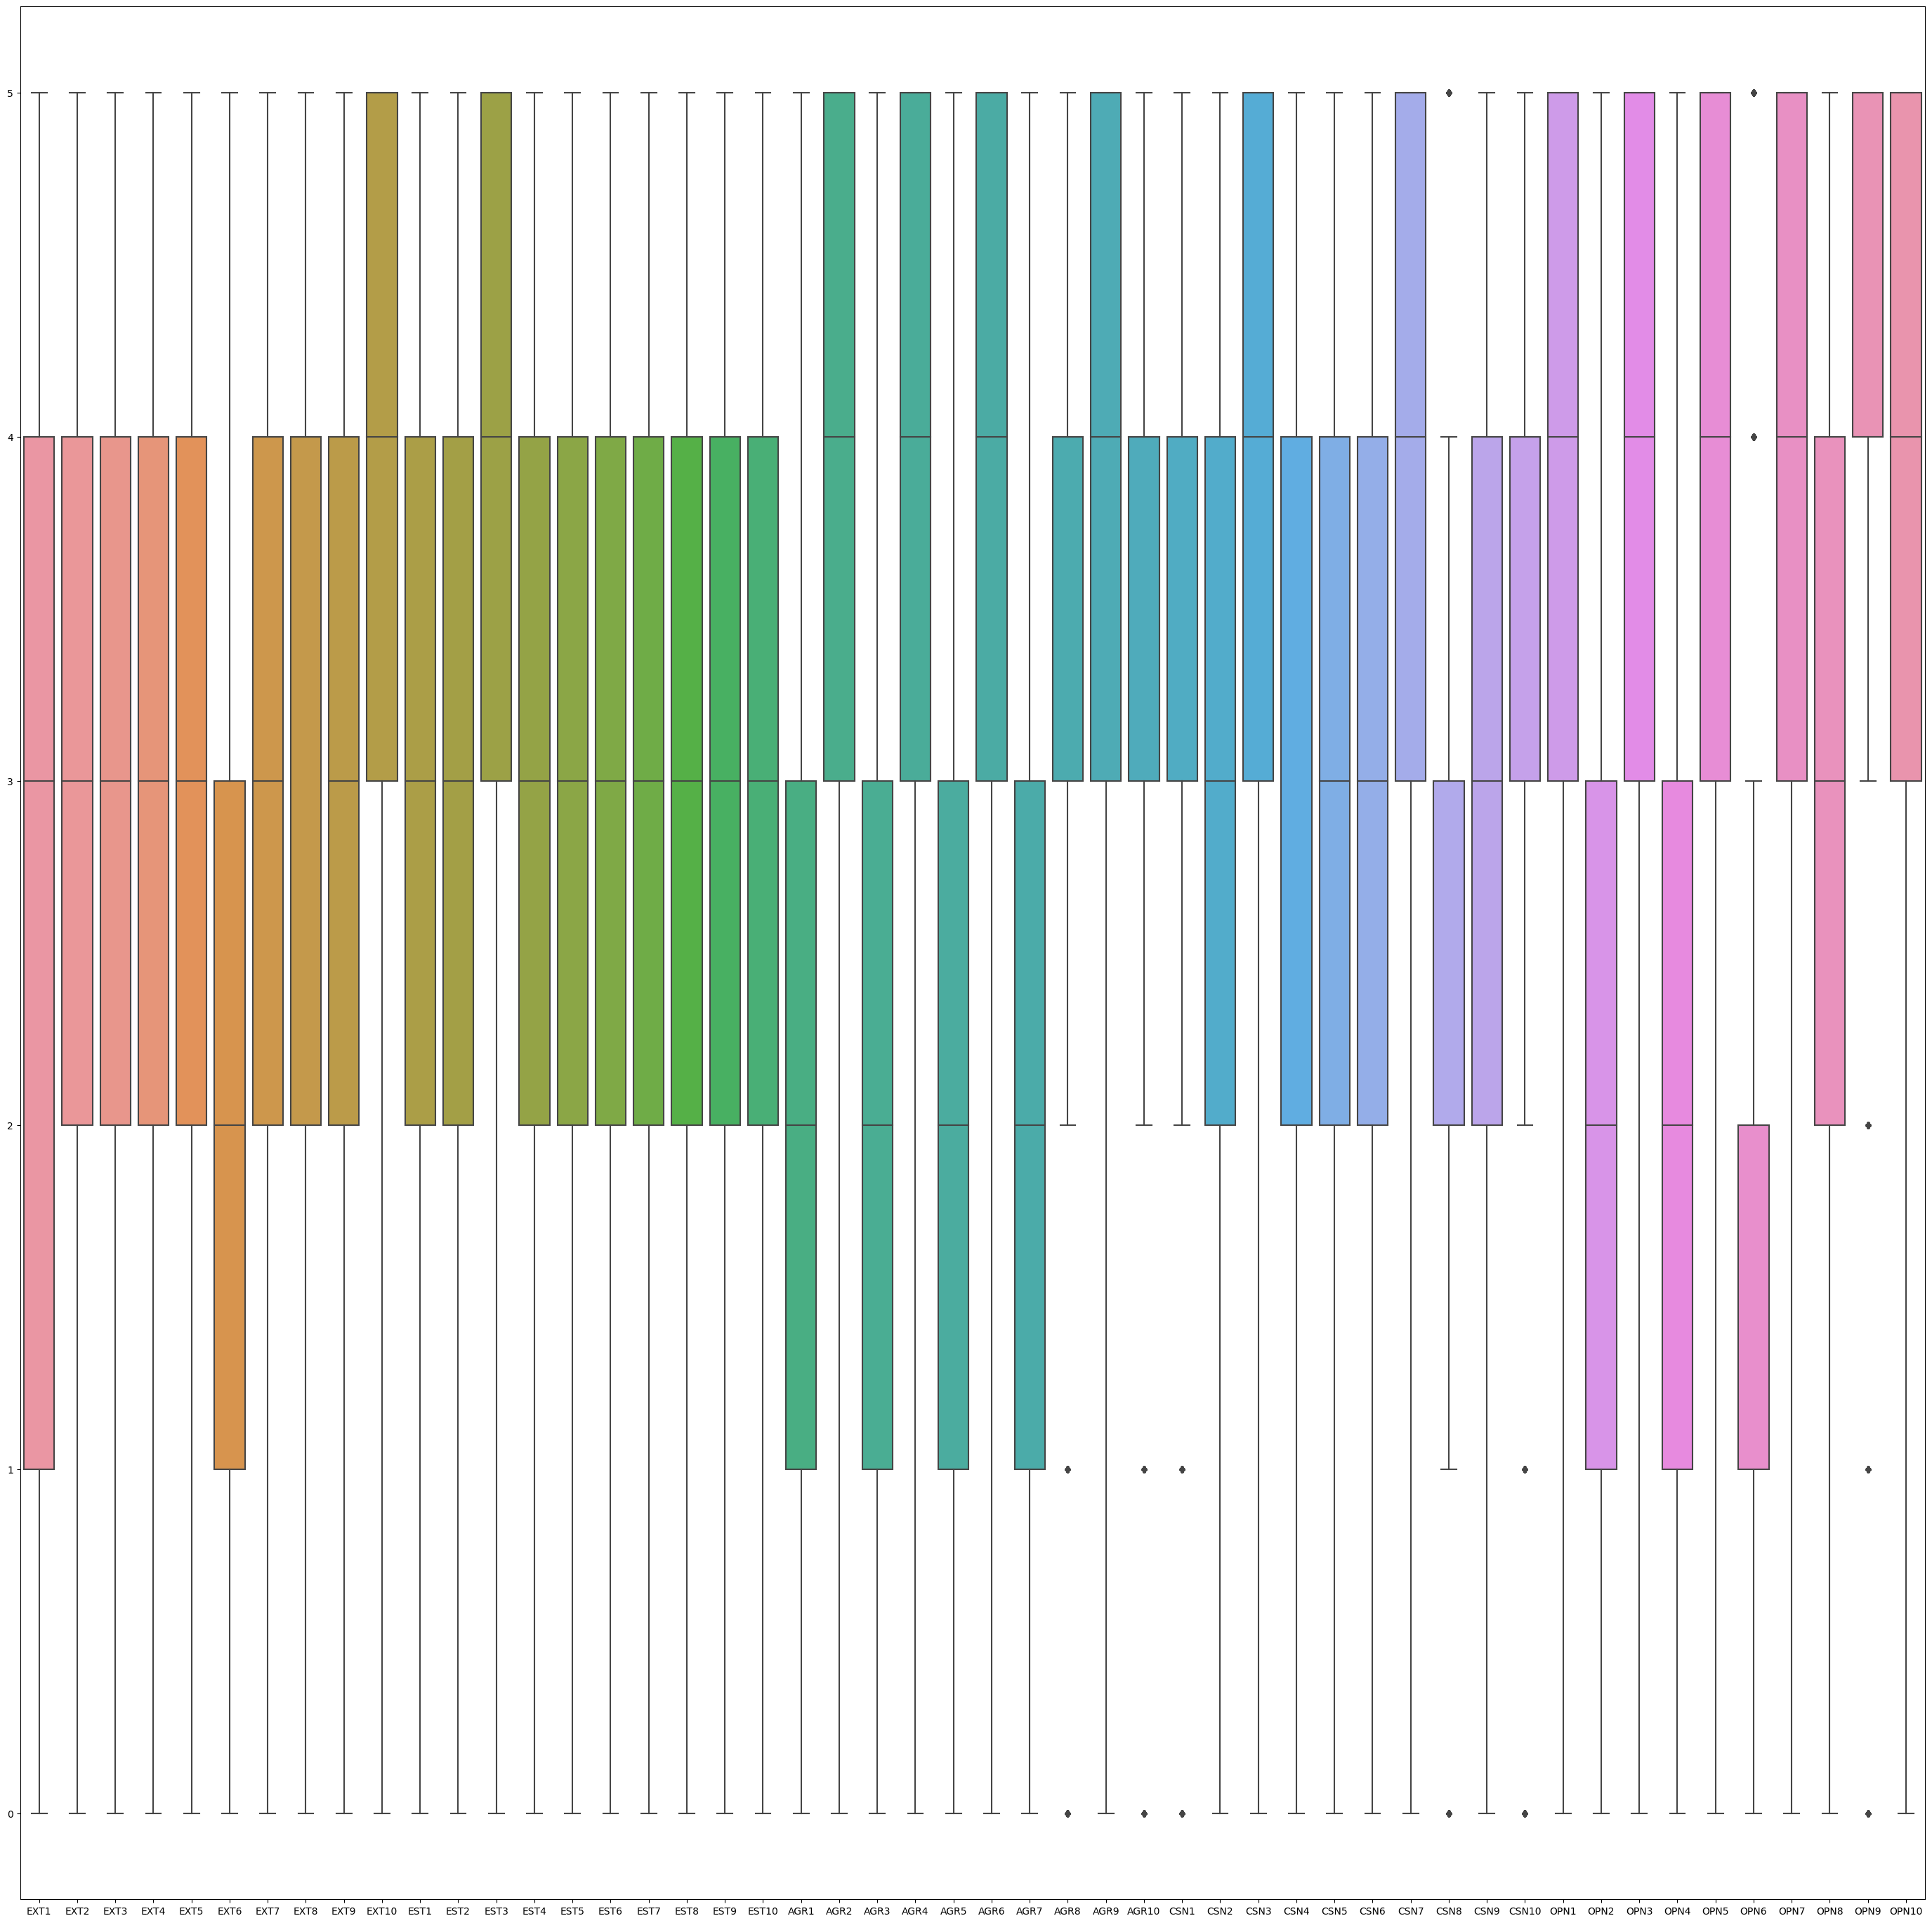

In [18]:
fig, ax = plt.subplots(figsize=(35,35))
sns.boxplot(data=data, ax = ax)
plt.show()

* <b> Data is pretty clean and not much outliers. </b>

<b> DATA MODELING- K-MEANS CLUSTERING </b>

In [24]:
from sklearn.cluster import KMeans
kmean=KMeans(n_clusters=5)
kmean_fit=kmean.fit(data)

<b> PREDICTIONS </b>

In [25]:
predictions=kmean_fit.labels_
data['clusterNum']=predictions

C:\Users\Vikas Velmurugan\AppData\Local\Temp\ipykernel_14216\586905501.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['clusterNum']=predictions


In [26]:
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,clusterNum
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,4
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,3
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,3
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,4
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,2


In [27]:
data.sample(10)

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,clusterNum
17067,3.0,2.0,3.0,4.0,2.0,2.0,3.0,3.0,1.0,4.0,...,2.0,4.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,1
806016,3.0,3.0,2.0,2.0,2.0,1.0,1.0,2.0,4.0,3.0,...,2.0,4.0,2.0,4.0,1.0,4.0,3.0,5.0,4.0,4
826926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
209581,4.0,1.0,3.0,1.0,4.0,2.0,0.0,1.0,4.0,2.0,...,1.0,5.0,1.0,5.0,1.0,4.0,4.0,5.0,5.0,4
101637,5.0,1.0,5.0,1.0,5.0,1.0,5.0,2.0,5.0,1.0,...,1.0,5.0,1.0,4.0,1.0,4.0,2.0,4.0,4.0,2
980247,4.0,4.0,4.0,3.0,4.0,1.0,3.0,2.0,4.0,3.0,...,1.0,5.0,2.0,5.0,1.0,5.0,3.0,4.0,5.0,4
624044,5.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0,1.0,1.0,...,1.0,4.0,1.0,5.0,1.0,5.0,4.0,4.0,5.0,4
229758,1.0,5.0,3.0,5.0,1.0,4.0,1.0,5.0,1.0,5.0,...,1.0,1.0,1.0,3.0,4.0,2.0,4.0,5.0,3.0,3
104117,3.0,3.0,5.0,2.0,4.0,2.0,4.0,2.0,4.0,2.0,...,3.0,4.0,3.0,4.0,3.0,4.0,5.0,4.0,4.0,2
956406,1.0,4.0,2.0,5.0,2.0,2.0,2.0,5.0,1.0,4.0,...,1.0,5.0,1.0,3.0,1.0,5.0,4.0,4.0,3.0,3


In [28]:
data.clusterNum.value_counts()

4    301270
1    215134
3    182820
2    163230
0    151104
Name: clusterNum, dtype: int64